In [24]:
# READ SENSOR DATA
import pandas as pd
df2 = pd.read_csv("peers_db")
df2.head()

,addr
0,178.62.34.210:8333
1,147.32.30.55:8333
2,192.175.59.140:8333
3,45.55.50.102:8333
4,47.90.86.42:8333


In [25]:
import requests
import json
import time

def getcountry(ip):
    KEY = "e52ea3af34144855795d5e70b61ed107064383152ee97feed21d46a1d646180e"
    url = "http://api.ipinfodb.com/v3/ip-city/?key="+KEY+"&ip="+ip
#     url = "http://api.ipinfodb.com/v3/ip-country/?key="+KEY+"&ip="+ip
    country_result = requests.get(url)
    time.sleep(0.5)
#     return country_result.text.split(";")[4] + "("+country_result.text.split(";")[3]+")"
    return country_result.text.split(";")

address = getcountry("147.32.30.55")
print(address)

['OK', '', '147.32.30.55', 'CZ', 'Czech Republic', 'Praha, Hlavni mesto', 'Prague', '150 00', '50.088', '14.4208', '+01:00']


In [26]:
"{} {}".format(address[8],address[9])

'50.088 14.4208'

In [39]:
# ADD SENSORS
import requests
import json
import pprint as pp

url2= "http://myos.ir:8081/catalog/zblock"
headers2 = {'IDENTITY_KEY': '59dcef45a5faf4a3390eec479de49daf26c0d4498681589752fd25b9c70e6f27'}

for index, peer in df2.iterrows():
    address = getcountry(peer["addr"].split(":")[0])

    data = {"sensors":[
    {"sensor": peer["addr"].replace(".","_").replace(":","_"),
    "description":"btc peer sensor",
    #"type":"air_quality_pm25", 
    "type":"generic", 
#     "dataType":"number",
#     "unit":"",
    "component": peer["addr"].replace(".","_").replace(":","_"), 
    "componentType":"generic",
    "componentDesc":"btc peer",
    "publicAccess" : True,
    "location":"{} {}".format(address[8],address[9]),
    "timeZone":"CET" }]}
    data_json = json.dumps(data)
    pp.pprint (data_json)

    response = requests.post(url2, data=data_json, headers=headers2)
    print(response.status_code,response.content)


('{"sensors": [{"sensor": "52_67_166_61_8333", "description": "btc peer '
 'sensor", "type": "generic", "component": "52_67_166_61_8333", '
 '"componentType": "generic", "componentDesc": "btc peer", "publicAccess": '
 'true, "location": "-23.5475 -46.6361", "timeZone": "CET"}]}')
200 b''
('{"sensors": [{"sensor": "178_62_34_210_8333", "description": "btc peer '
 'sensor", "type": "generic", "component": "178_62_34_210_8333", '
 '"componentType": "generic", "componentDesc": "btc peer", "publicAccess": '
 'true, "location": "51.5085 -0.12574", "timeZone": "CET"}]}')
200 b''
('{"sensors": [{"sensor": "147_32_30_55_8333", "description": "btc peer '
 'sensor", "type": "generic", "component": "147_32_30_55_8333", '
 '"componentType": "generic", "componentDesc": "btc peer", "publicAccess": '
 'true, "location": "50.088 14.4208", "timeZone": "CET"}]}')
200 b''
('{"sensors": [{"sensor": "192_175_59_140_8333", "description": "btc peer '
 'sensor", "type": "generic", "component": "192_175_59_140_

In [34]:
import requests
import json
import pprint as pp

headers2 = {'IDENTITY_KEY': '59dcef45a5faf4a3390eec479de49daf26c0d4498681589752fd25b9c70e6f27'}


response = requests.get("http://myos.ir:8081/catalog/zblock/", headers=headers2)
print(response.status_code)


200


In [77]:
data_json = json.loads(response.text)
lats = []
longs = []
for i in data_json['providers'][0]['sensors']:
    a = i['location'].split(' ')
    lats.append(float(a[0]))
    longs.append(float(a[1]))
len(lats)

1251

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

m = Basemap(resolution='c',
            projection='kav7',
            lat_0=0., # Center around
            lon_0=0.) # lat 0, lon 0

n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

/root/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


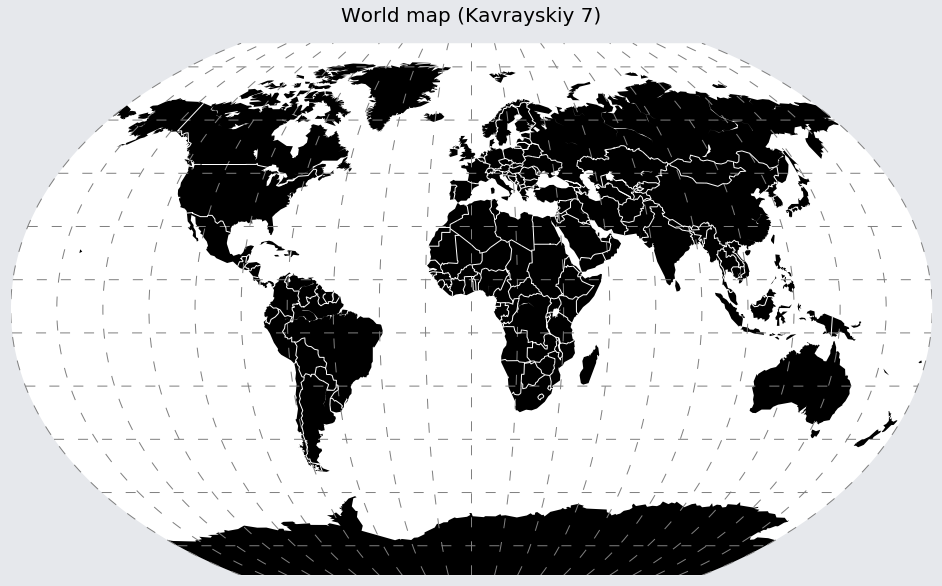

In [14]:
fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', 
                 lake_color='white')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

title = plt.title('World map (Kavrayskiy 7)', 
                  fontsize=20) 
title.set_y(1.03) # Move the title a bit for niceness

/root/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/root/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/root/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


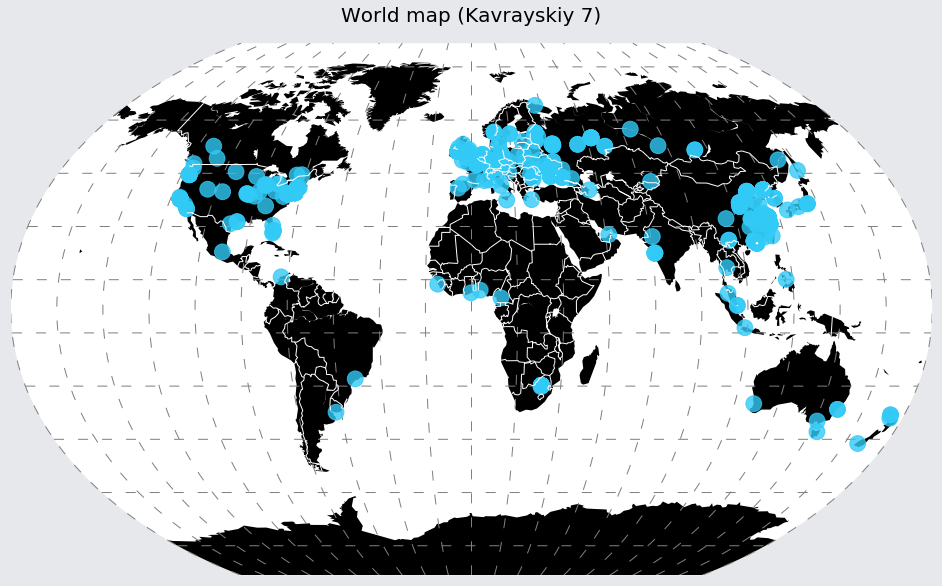

In [78]:
# http://maxberggren.se/2015/08/04/basemap/

# m.readshapefile('shapefiles/ne_110m_populated_places/ne_110m_populated_places', 
#                 name='populated_places', 
#                 drawbounds=False, 
#                 color='none')

fig1 = plt.figure(figsize=(16,20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1,0.1,0.8,0.8])

m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')
m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)
m.drawcoastlines(linewidth=0)
m.fillcontinents('black', 
                 lake_color='white')
m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

title = plt.title('World map (Kavrayskiy 7)', 
                  fontsize=20) 
title.set_y(1.03) 

# Move the title a bit for niceness
# populations = [r['POP2000'] for r in m.populated_places_info]
# lats = [r['LATITUDE'] for r in m.populated_places_info]
# lons = [r['LONGITUDE'] for r in m.populated_places_info]

x1, y1 = m(longs,lats) 
# Convert coords to projected place in figure
m.scatter(x1, y1, 
          s=np.array([50 for i in range(len(lats))])*5, 
          marker="o", 
          color='#32caf6',
          zorder=10, 
          alpha=0.8)